






# Import all the Dependencies

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

# Set all the Constants

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=2

# Import data into tensorflow dataset object

In [3]:
dataset_train = tf.keras.preprocessing.image_dataset_from_directory(
    "C:/Users/ram reddy/Downloads/Apple_leaf_diease/train",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)
dataset_test = tf.keras.preprocessing.image_dataset_from_directory(
    "C:/Users/ram reddy/Downloads/Apple_leaf_diease/test",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)
dataset_valid = tf.keras.preprocessing.image_dataset_from_directory(
    "C:/Users/ram reddy/Downloads/Apple_leaf_diease/valid",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 5828 files belonging to 4 classes.
Found 1943 files belonging to 4 classes.
Found 1943 files belonging to 4 classes.


In [4]:
class_names_train = dataset_train.class_names
class_names_train
class_names_test = dataset_test.class_names
class_names_test
class_names_valid = dataset_valid.class_names
class_names_valid

['Black rot', 'Cedar Rust', 'Healthy', 'Scab']

In [5]:
len(class_names_train)
len(class_names_test)
len(class_names_valid)

4

In [6]:
len(dataset_train)

183

In [7]:
len(dataset_test)

61

In [8]:
for image_batch, labels_batch in dataset_train.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[0 2 0 2 0 0 3 3 0 1 0 2 2 0 2 2 0 1 3 2 1 3 1 0 3 1 2 3 3 0 0 1]


# Visualize some of the images from our dataset

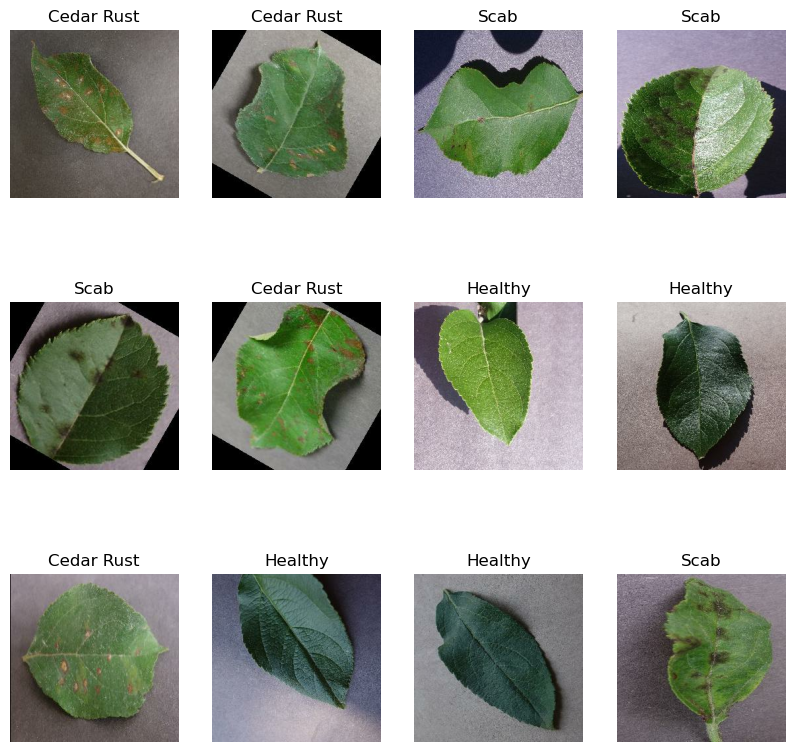

In [9]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset_train.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names_train[labels_batch[i]])
        plt.axis("off")

# Cache, Shuffle, and Prefetch the Dataset

In [10]:
train_ds = dataset_train.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = dataset_valid.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = dataset_test.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# Building the Model

In [11]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

# Data Augmentation

In [12]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

# Applying Data Augmentation to Train Dataset

In [13]:
train_ds=train_ds.map(
    lambda x,y:(data_augmentation(x,training=True),y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

# Model Architecture

In [14]:
input_shape=( BATCH_SIZE  ,  IMAGE_SIZE , IMAGE_SIZE , CHANNELS )
n_classes = len(class_names_train)
n_classes

4

In [15]:
CHANNELS

3

In [16]:
model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

# Compiling the Model

In [18]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds,
)

Epoch 1/2


: 

In [19]:
scores=model.evaluate(test_ds)

61/61 [==============================] - 113s 1s/step - loss: 1.3836 - accuracy: 0.2553


In [20]:
scores

[1.3836262226104736, 0.25527533888816833]

# Plotting the Accuracy and Loss Curves

In [21]:
history

import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=2
dataset_train = tf.keras.preprocessing.image_dataset_from_directory(
    "C:/Users/ram reddy/Downloads/Apple_leaf_diease/train",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)
dataset_test = tf.keras.preprocessing.image_dataset_from_directory(
    "C:/Users/ram reddy/Downloads/Apple_leaf_diease/test",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)
dataset_valid = tf.keras.preprocessing.image_dataset_from_directory(
    "C:/Users/ram reddy/Downloads/Apple_leaf_diease/valid",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)
class_names_train = dataset_train.class_names
class_names_train
class_names_test = dataset_test.class_names
class_names_test
class_names_valid = dataset_valid.cla

In [22]:
history.params

NameError: name 'history' is not defined

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
type(history.history['loss'])

list

In [ ]:
len(history.history['loss'])

20

In [ ]:
history.history['loss'][:5]

[0.8426423072814941,
 0.5004450678825378,
 0.29849478602409363,
 0.22162120044231415,
 0.16812768578529358]

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

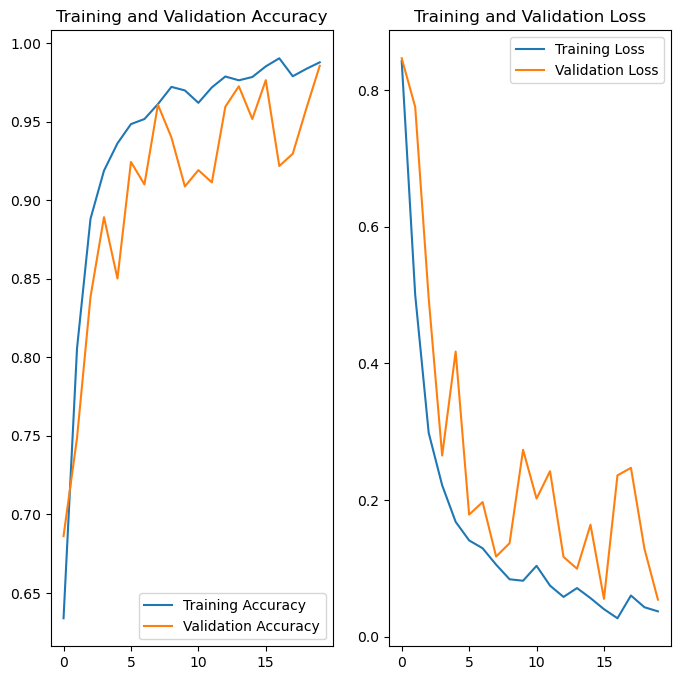

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend (loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss') 
plt.plot(range (EPOCHS), val_loss, label='Validation Loss')
plt.legend (loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Run prediction on a sample image

first image to predict
actual label:  black_rot
1/1 [==============================] - 0s 384ms/step
predicted label:  black_rot


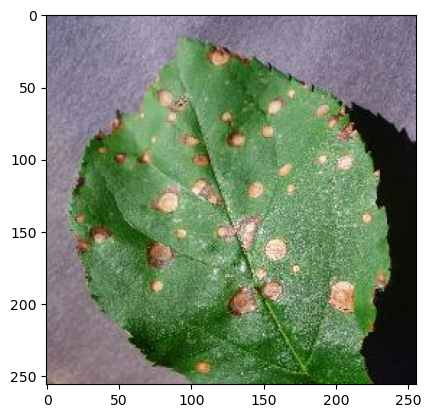

In [ ]:
import numpy as np

for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')

    first_label = labels_batch[0].numpy()

    print("first image to predict")

    plt.imshow(first_image)

    print("actual label: ",class_names [first_label])

    batch_prediction = model.predict(images_batch) 
    print("predicted label: ",class_names[np.argmax(batch_prediction[0])])

# Write a function for inference

In [ ]:
def predict (model, img):

    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy()) 
    img_array = tf.expand_dims (img_array, 0) 
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax (predictions[0])]

    confidence = round(100 *(np.max(predictions[0])), 2) 
    return predicted_class, confidence

1/1 [==============================] - 0s 26ms/step


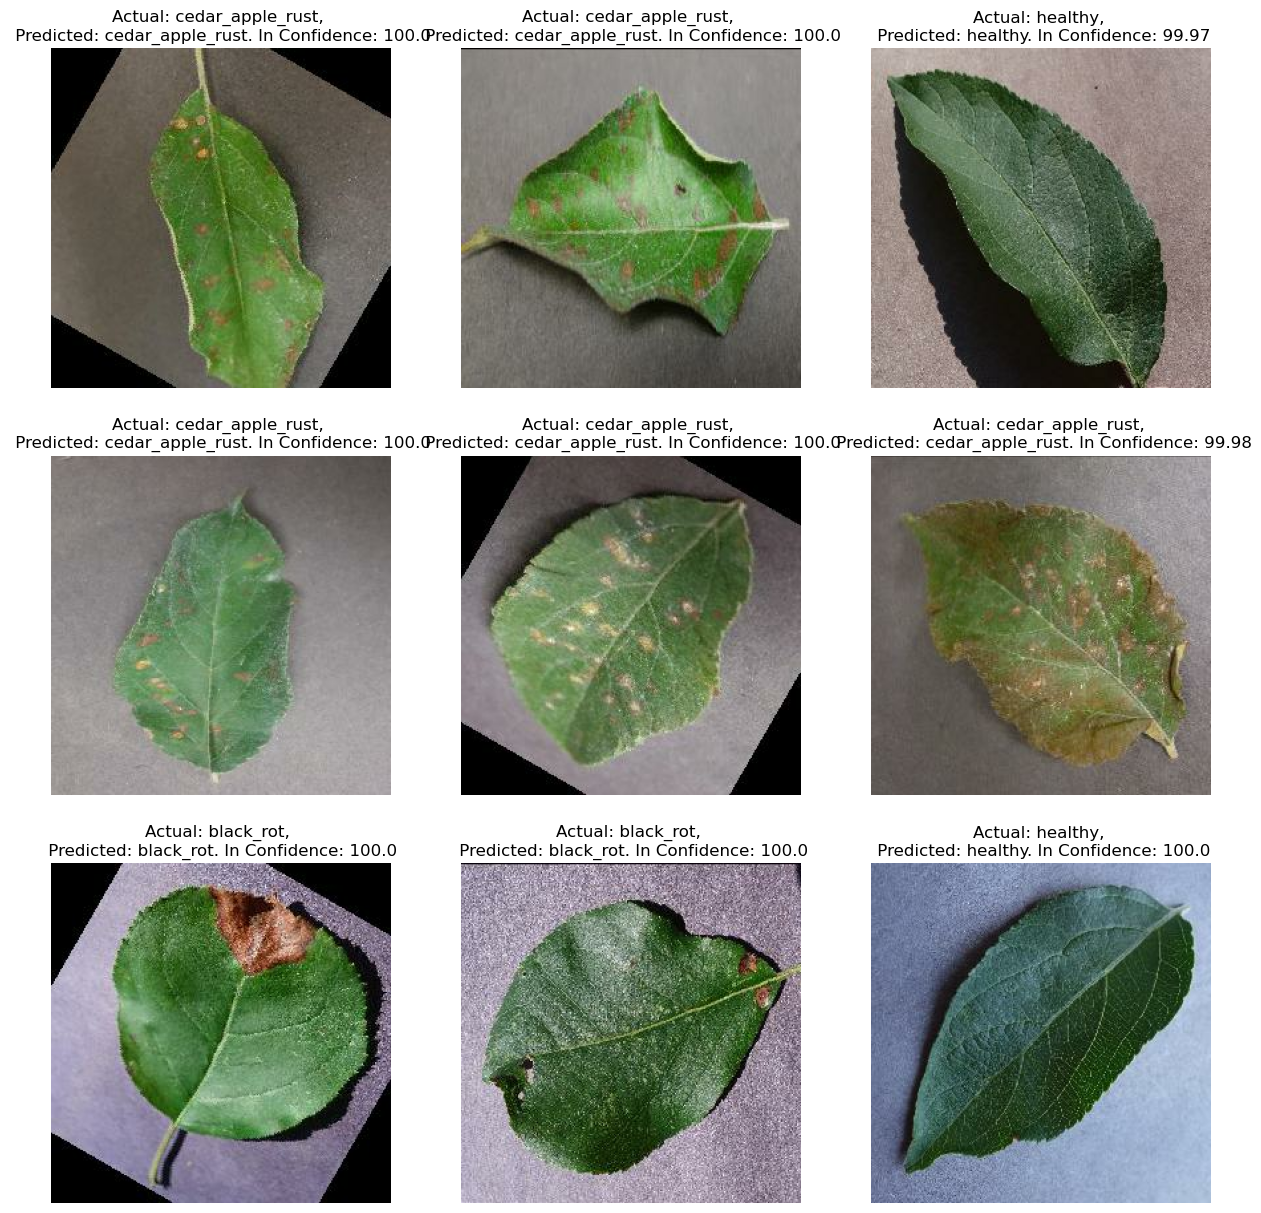

In [ ]:
plt.figure(figsize=(15, 15))

for images, labels in test_ds.take(1):

    for i in range(9):

        ax = plt.subplot(3, 3, i + 1)

        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict (model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}. In Confidence: {confidence}")

        plt.axis("off")

# Saving the Model

In [ ]:
import os
model_version=max([int(i) for i in os.listdir("C:/Users/NIHARIKA/Minor/models") + [0]])+1
model.save(f"C:/Users/NIHARIKA/Minor/models/{model_version}")

INFO:tensorflow:Assets written to: C:/Users/NIHARIKA/Minor/models/1\assets


INFO:tensorflow:Assets written to: C:/Users/NIHARIKA/Minor/models/1\assets


In [ ]:
model.save("C:/Users/NIHARIKA/Minor/models/apple.h5")